# Tabular Playground Series
### Tabacaru Raluca Gabriela 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor


# Table of contents
1. [Data Exploretion](#introdution) 
2. [Data Analysis ](#dataset)  
    2.1 [The dataset's content](#content)  
    2.2 [Remove not useful features](#features)  
    2.3 [Descriptive statistics ](#statistics)  
    2.4 [Missing values](#missing)  
    2.5 [Features distribution](#distribution)  
    2.6 [Target analysis](#target)  
3. [Pre-Processing](#Pre-Processing)  
    3.1 [Train-validation split](#split)  
    3.1 [Data Rescaling](#normalization)  
4. [Model Generation](#ModelGen)  
    4.1 [HistGradientBoostingRegressor](#HGBR)  
    4.2 [AdaBoostRegressor](#ABR)  
    4.3 [Results](#r)  
5. [Conclusion](#end)
        

## 1. Data Exploretion<a name="introduction">  
    
The train-set was upload in a DataFrame object. It's first rows are displayed below.

In [2]:
df_train = pd.read_csv("./train.csv")
df_train.head()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f110,f111,f112,f113,f114,f115,f116,f117,f118,claim
0,0,0.10859,0.004314,-37.566,0.017364,0.28915,-10.25100,135.12,168900.0,3.992400e+14,...,-12.2280,1.7482,1.90960,-7.11570,4378.80,1.2096,8.613400e+14,140.1,1.01770,1
1,1,0.10090,0.299610,11822.000,0.276500,0.45970,-0.83733,1721.90,119810.0,3.874100e+15,...,-56.7580,4.1684,0.34808,4.14200,913.23,1.2464,7.575100e+15,1861.0,0.28359,0
2,2,0.17803,-0.006980,907.270,0.272140,0.45948,0.17327,2298.00,360650.0,1.224500e+13,...,-5.7688,1.2042,0.26290,8.13120,45119.00,1.1764,3.218100e+14,3838.2,0.40690,1
3,3,0.15236,0.007259,780.100,0.025179,0.51947,7.49140,112.51,259490.0,7.781400e+13,...,-34.8580,2.0694,0.79631,-16.33600,4952.40,1.1784,4.533000e+12,4889.1,0.51486,1
4,4,0.11623,0.502900,-109.150,0.297910,0.34490,-0.40932,2538.90,65332.0,1.907200e+15,...,-13.6410,1.5298,1.14640,-0.43124,3856.50,1.4830,-8.991300e+12,NaN,0.23049,1


## 2. Data Analysis  <a name="dataset">  

### 2.1  The dataset's content  <a name="content">

The dataset size is:

In [3]:
print(df_train.shape)
print("Number of samples:", df_train.shape[0])
print("Number of features:", df_train.shape[1])

(957919, 120)
Number of samples: 957919
Number of features: 120


The dataset features are:

In [4]:
featureNames = list(df_train)
print(featureNames)

['id', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50', 'f51', 'f52', 'f53', 'f54', 'f55', 'f56', 'f57', 'f58', 'f59', 'f60', 'f61', 'f62', 'f63', 'f64', 'f65', 'f66', 'f67', 'f68', 'f69', 'f70', 'f71', 'f72', 'f73', 'f74', 'f75', 'f76', 'f77', 'f78', 'f79', 'f80', 'f81', 'f82', 'f83', 'f84', 'f85', 'f86', 'f87', 'f88', 'f89', 'f90', 'f91', 'f92', 'f93', 'f94', 'f95', 'f96', 'f97', 'f98', 'f99', 'f100', 'f101', 'f102', 'f103', 'f104', 'f105', 'f106', 'f107', 'f108', 'f109', 'f110', 'f111', 'f112', 'f113', 'f114', 'f115', 'f116', 'f117', 'f118', 'claim']


### 2.2 Remove not useful features <a name="features">

In this case id feature is not useful in this analysis

In [5]:
df_train = df_train.drop(columns="id")
featureNames = list(df_train)

### 2.3 Descriptive statistics <a name="statistics">
A few statistics can be derived from the dataset using the "describe" method which provides this information:  
- count: the number of elements present in each feature;
- mean: the average of a feature;
- std: the standard deviation of observation;
- min: the minimum value of the feature;
- 25%: the 25 percentile;
- 50%: the 50 percentile;
- 75%: the 75 percentile;
- max: the maximum value of the feature.

Below is a summary table with the data:

In [6]:
df_train.describe()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f110,f111,f112,f113,f114,f115,f116,f117,f118,claim
count,942672.000000,942729.000000,942428.000000,942359.000000,942514.000000,942398.000000,942415.000000,9.425460e+05,9.426700e+05,942696.000000,...,942554.000000,942420.000000,942509.000000,942686.000000,942481.000000,942360.000000,9.423300e+05,942512.000000,942707.000000,957919.000000
mean,0.090201,0.345964,4068.744207,0.201214,0.304869,-0.071458,1620.843815,3.771642e+05,1.806054e+15,5323.442367,...,-19.926398,2.074530,23.885245,1.748777,63152.973540,1.208876,4.276905e+16,3959.204669,0.559267,0.498492
std,0.043564,0.146251,6415.829440,0.212510,0.145343,2.123777,1276.281403,3.454325e+05,2.335204e+15,10068.380032,...,18.578439,0.895793,45.581360,10.088848,92435.016241,0.114959,6.732441e+16,3155.991777,0.408426,0.499998
min,-0.149910,-0.019044,-9421.700000,-0.082122,-0.006990,-12.791000,-224.800000,-2.984300e+04,-1.153300e+15,-26404.000000,...,-105.860000,0.277040,-27.691000,-26.589000,-81977.000000,0.905270,-8.944400e+15,-415.240000,-0.151240,0.000000
25%,0.070227,0.283050,418.430000,0.035086,0.240520,-1.120700,481.545000,9.120900e+04,1.153100e+13,75.876750,...,-28.812000,1.487700,-0.628880,-4.473975,2443.200000,1.146800,2.321100e+14,1306.200000,0.276560,0.000000
50%,0.090135,0.389100,1279.500000,0.137000,0.327790,-0.380110,1446.100000,2.896700e+05,5.043050e+14,1073.200000,...,-14.636000,1.662100,1.727700,0.885710,19479.000000,1.177200,1.327500e+16,3228.000000,0.473440,0.000000
75%,0.116500,0.458450,4444.400000,0.297100,0.412830,0.921940,2495.900000,5.605600e+05,3.103100e+15,5693.200000,...,-5.325300,2.522325,18.991000,6.840775,88488.000000,1.242000,5.278700e+16,6137.900000,0.746210,1.000000
max,0.415170,0.518990,39544.000000,1.319900,0.554750,11.202000,5426.600000,1.913700e+06,1.042400e+16,85622.000000,...,1.613400,4.565900,217.840000,47.757000,526050.000000,1.886700,3.249900e+17,13151.000000,2.743600,1.000000


### 2.4 Missing values <a name="missing">
  
In order to implement algorithms correctly, it is important to identify whether any values are missing in the dataset. In the event that they were present, this would require a correction to prevent the problem. The simplest solution is, for example, to remove them from the dataset.

In [7]:
missing = df_train.isnull().sum()

if missing.sum() == 0:
    print("In this dataset there are no missing values.")
else:
    print(f"In this dataset there are some missing values:\n{missing}")

In this dataset there are some missing values:
f1       15247
f2       15190
f3       15491
f4       15560
f5       15405
         ...  
f115     15559
f116     15589
f117     15407
f118     15212
claim        0
Length: 119, dtype: int64


I try to remove all missing value 

In [8]:
df_train_rm = df_train.dropna()
print("Number of samples:", df_train_rm.shape[0])

Number of samples: 359464


Since there are too many missing values, it is not a good idea to remove them all because the dataset becomes too small compared to the original dataset. So I try to replace missing values with the mean of all values for each feature

In [9]:
for feature in featureNames:
    df_train_mean = df_train.fillna(df_train[feature].mean())

In [10]:
print("Number of samples:", df_train_mean.shape[0])

Number of samples: 957919


In this way I preserve the dimension of the dataset

### 2.5 Features distributions <a name="distribution">  

Below is a visual representation of the distribution of features within the dataset:

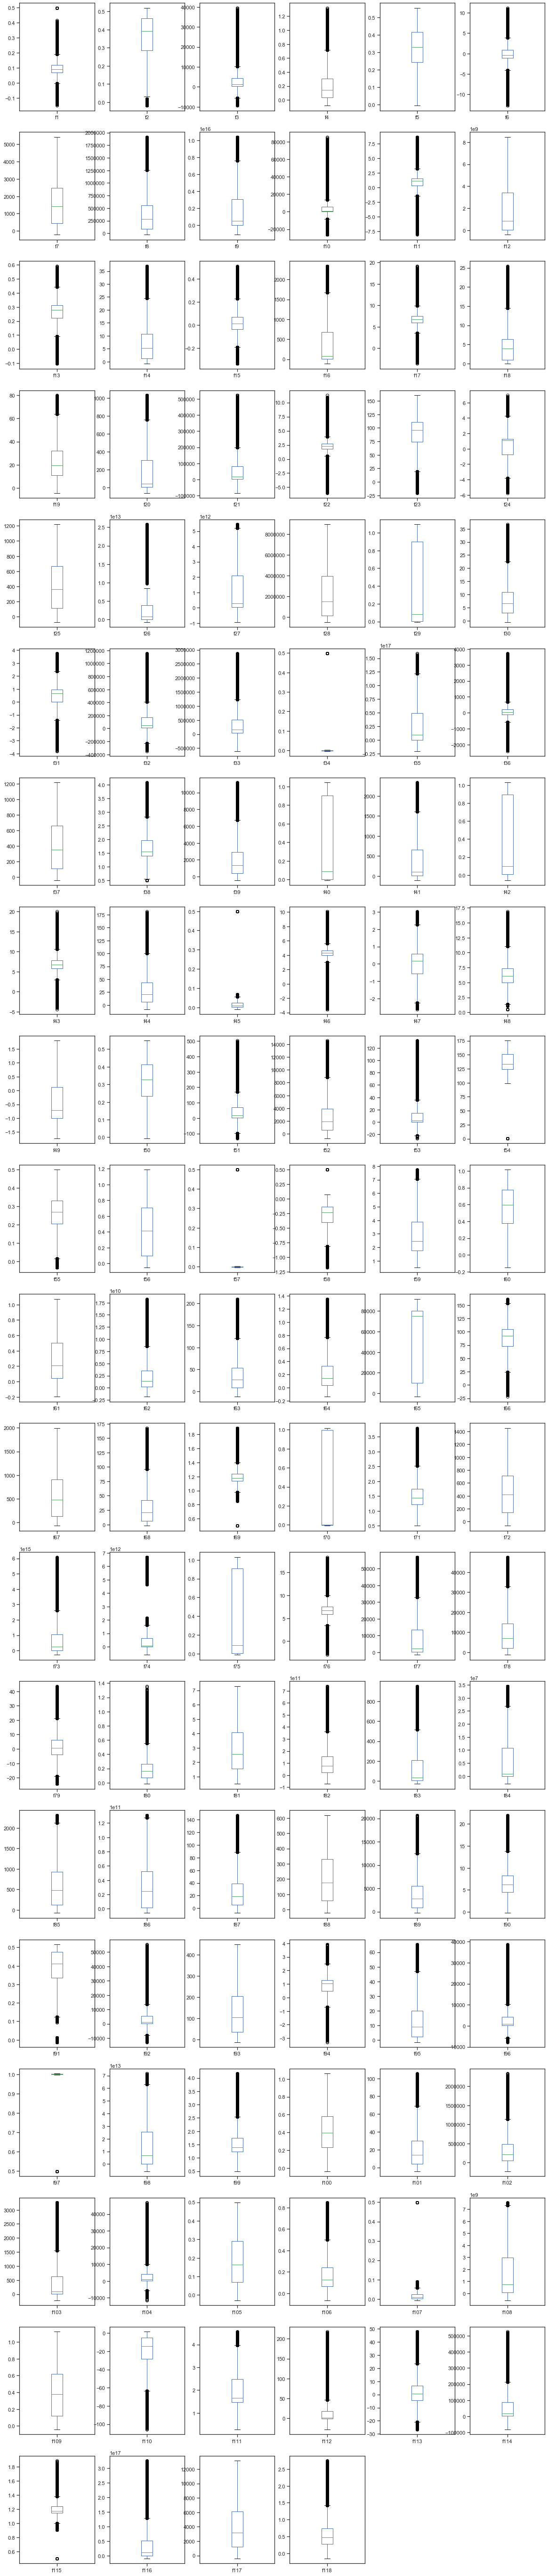

In [11]:
features = df_train_mean.drop(columns="claim")
features.plot(kind='box', subplots=True, layout=(20,6), figsize=(20,100), sharex=False, sharey=False)
plt.show()

There area so many outliers. Outliers are anomalous observations that are numerically distant from the rest of the data. In a box plot, an outlier represents a data point that occurs outside its whiskers.

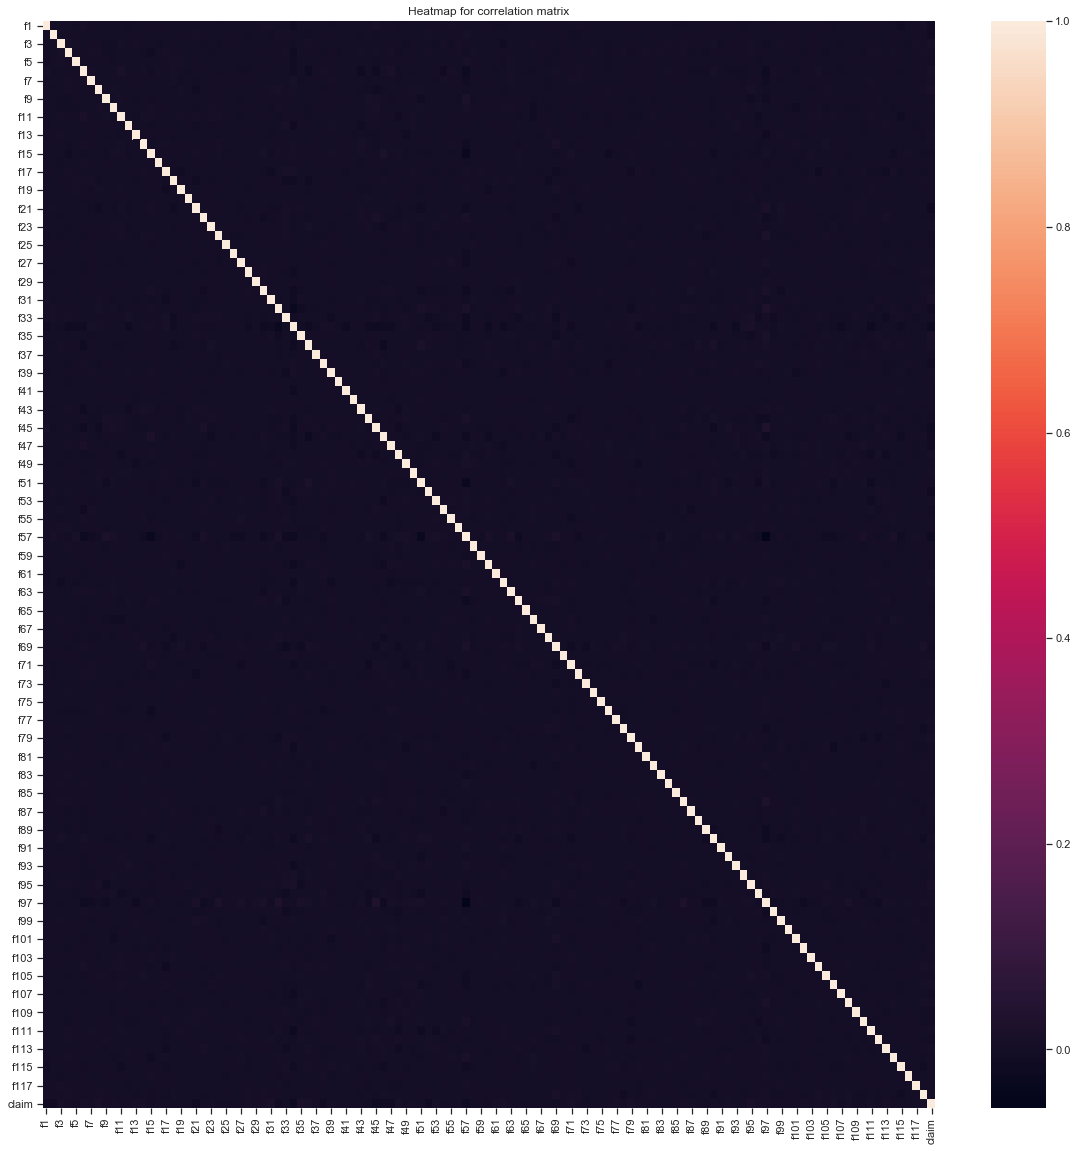

In [12]:
corrMatrix = df_train.corr()
plt.figure(figsize=(20, 20))
ax = sns.heatmap(corrMatrix, annot=False)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_title("Heatmap for correlation matrix")
plt.show()

There is not any significant correlation between features.

### 2.6 Target analysis<a name="target">

In [13]:
print('The target classes are:')
df_train_mean.claim.unique()

The target classes are:


array([1, 0], dtype=int64)

<BarContainer object of 2 artists>

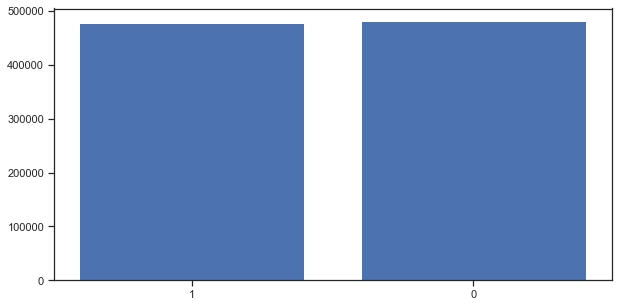

In [14]:
# summarize distribution
counter = Counter(df_train_mean.claim)
x = np.arange(len(counter.keys()))
plt.figure(figsize=(10,5))
plt.xticks(x, counter.keys())
plt.bar(x, counter.values(),width=0.8)

The dataset is balanced 

## 3. Pre-Processing <a name="Pre-Processing">

### 3.2 Train-validation split <a name="split">

The dataset was divided into 2/3 training dataset and 1/3 validation dataset.
The division is performed using the train_test_split library function that, given a proportion of validation set size to training set size, returns the divided dataset.

In [15]:
#split dataset without missing value
X = df_train_mean.drop(columns=['claim']).values
Y = df_train_mean['claim'].values
X_train, X_validation, Y_train, Y_validation = train_test_split( X, Y, test_size=0.33)


print("The size of the training set is:", len(X_train))
print("The size of the test set is:", len(X_validation))

#split dataset with missing value
X_missing = df_train.drop(columns=['claim']).values
Y_missing = df_train['claim'].values
X_train_m, X_validation_m, Y_train_m, Y_validation_m = train_test_split( X_missing, Y_missing, test_size=0.33)

The size of the training set is: 641805
The size of the test set is: 316114


### 3.3 Data Rescaling <a name="normalization"> 
    
Since data contain attributes with scales for many quantities. Data attributes should be of equal scale for machine learning algorithms to work effectively, so i used standardization method

In [16]:
#dataset without missing value
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train_s = scaler.transform(X_train)
X_validation_s = scaler.transform(X_validation)

#dataset with missing value
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train_m)
# Apply transform to both the training set and the test set.
X_train_sm = scaler.transform(X_train_m)
X_validation_sm = scaler.transform(X_validation_m)

## 4. Model Generation <a name="ModelGen"> 
    


### 4.1 HistGradientBoostingRegressor  <a name="HGBR"> 

In [17]:
histGradientBoosting = HistGradientBoostingRegressor(max_depth=100)
histGradientBoosting.fit(X_train_s, Y_train)
Y_predict = histGradientBoosting.predict(X_validation_s)
score_H = roc_auc_score(Y_validation, Y_predict)
print(f'AUC: {score_H}')


AUC: 0.7715838083073933


Test on dataset with missing value

In [18]:
histGradientBoosting = HistGradientBoostingRegressor(max_depth=100)
histGradientBoosting.fit(X_train_sm, Y_train_m)
Y_predict = histGradientBoosting.predict(X_validation_sm)
score_HM = roc_auc_score(Y_validation_m, Y_predict)
print(f'AUC: {score_HM}')

AUC: 0.8012668309069682


### 4.2 AdaBoostRegressor  <a name="ABR"> 

In [19]:
adaBoost = AdaBoostRegressor(random_state=0, n_estimators=100)

adaBoost.fit(X_train_s, Y_train)
Y_predict = adaBoost.predict(X_validation_s)
    
score_A = roc_auc_score(Y_validation, Y_predict)
print(f'AUC: {score_A}')

AUC: 0.522459208945033


### 4.3 Results <a name="r"> 

Here is a summary of obtained results:


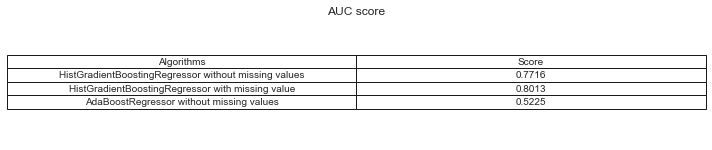

In [20]:
columns = [ 'Algorithms' ,'Score']
values = [['HistGradientBoostingRegressor without missing values', '{:0.4f}'.format(score_H)],
         ['HistGradientBoostingRegressor with missing value', '{:0.4f}'.format(score_HM)],
         ['AdaBoostRegressor without missing values', '{:0.4f}'.format(score_A)]]
fig, ax = plt.subplots(figsize=(10,2))
ax.axis('off')
ax.axis('tight')
ax.table(cellText=values, colLabels=columns, loc='center', cellLoc='center')
fig.tight_layout()
plt.title("AUC score")
plt.show()

## 5. Conclusion <a name="end">
    
The HistGradientBoostingRegressor algorithm applied on the dataset with missing value has the best result in this case. 
With a more in-depth analysis, other algorithms could also be applied and a more in-depth search of the hyperparamiters could be performed